In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
df = pd.read_csv("kc_house_data.csv")



In [67]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [68]:
df
df = df.drop(['id','date'], axis = 1)
# Drop rows with missing values
df.dropna(inplace=True)



#shuffling
df = df.sample(frac=1, random_state=42)  # frac=1 shuffles the entire dataset


#categoral values
df = pd.get_dummies(df, columns=['waterfront', 'view', 'condition'])
from sklearn.preprocessing import LabelEncoder


df['view_0'] = df['view_0'].astype(int)
df['view_1'] = df['view_1'].astype(int)
df['view_2'] = df['view_2'].astype(int)
df['view_3'] = df['view_3'].astype(int)
df['view_4'] = df['view_4'].astype(int)
df['condition_1'] = df['condition_1'].astype(int)
df['condition_2'] = df['condition_2'].astype(int)
df['condition_3'] = df['condition_3'].astype(int)
df['condition_4'] = df['condition_4'].astype(int)
df['condition_5'] = df['condition_5'].astype(int)

label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])
df.dtypes




price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
waterfront_0        bool
waterfront_1        bool
view_0             int32
view_1             int32
view_2             int32
view_3             int32
view_4             int32
condition_1        int32
condition_2        int32
condition_3        int32
condition_4        int32
condition_5        int32
dtype: object

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('price', axis=1))


In [70]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Define your feature matrix (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Create a linear regression model
model = LinearRegression()

# Create the RFECV selector
selector = RFECV(model, cv=5)

# Fit the selector to your data
selector.fit(X, y)

# Get the best combination of features
best_feature_combination = list(X.columns[selector.support_])
print( best_feature_combination)


X = df[best_feature_combination]
X_scaled = scaler.fit_transform(X)


['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5']


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=102127)

In [72]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [73]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")



Mean Squared Error (MSE): 37479114583.74419
R-squared (R2) Score: 0.7168623879199105


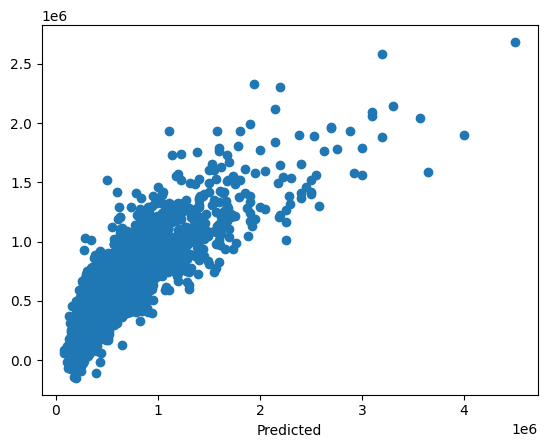

In [78]:
plt.scatter(y_test,y_pred)
plt.xlabel("Train")
plt.xlabel('Predicted')
plt.show()

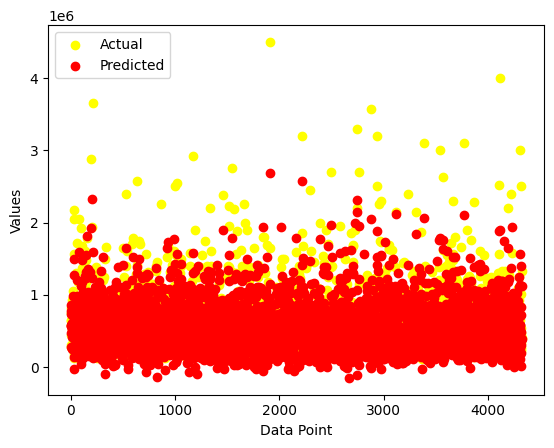

In [80]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color="yellow", label="Actual")
# just trying 
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted")
plt.xlabel("Data Point")
plt.ylabel("Values")
plt.legend()
plt.show()